## Student performance indicator


## EDA ANALYSIS

Data ingestion


## Life cycle of Machine learning Project

Understanding the Problem Statement

Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model


## 1. Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2. Data source

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

## 2.1 Import data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
## import dataset

In [4]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset information
gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete 

before test

math score

reading score

writing score

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3. Data checks to perform in general
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different 

categorical column

In [7]:
#check for missing values
df.isna().sum()
# this will show how many missivalues in each columns

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# check number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
##  adding columns for total score and avg score for each student

df["total_score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average_score"]=round(df["total_score"]/3)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [14]:
# people with full marks in maths
math_full=df[df["math score"]==100]["average_score"].count()
print("math_full==",math_full)

math_full== 7


In [15]:
math_score_under_33=df[df["math score"]<33]["average_score"].count()
reading_score_under_33=df[df["reading score"]<33]["average_score"].count()
writing_score_under_33=df[df["writing score"]<33]["average_score"].count()

# this gives number of students having score less than 33 in respective subjects
math_score_under_33,writing_score_under_33,reading_score_under_33

(np.int64(19), np.int64(12), np.int64(11))

Insights:--

From above values we get students have performed the worst in Maths

Best performance is in reading section

## 4. Visualizations


#4.1 Visualize average score distribution

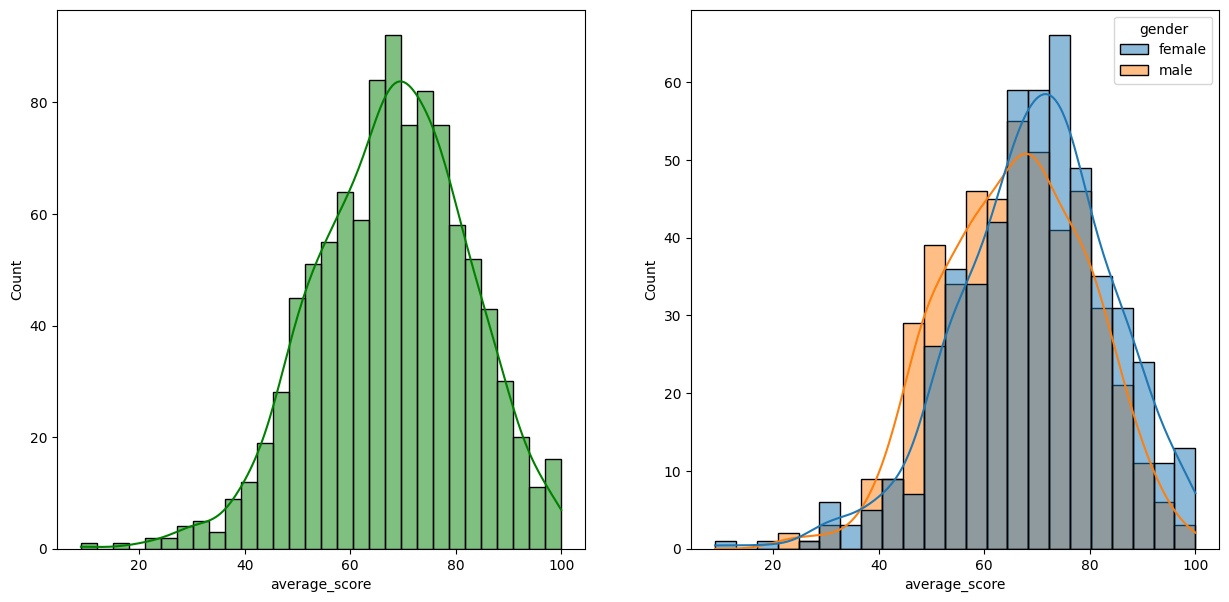

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

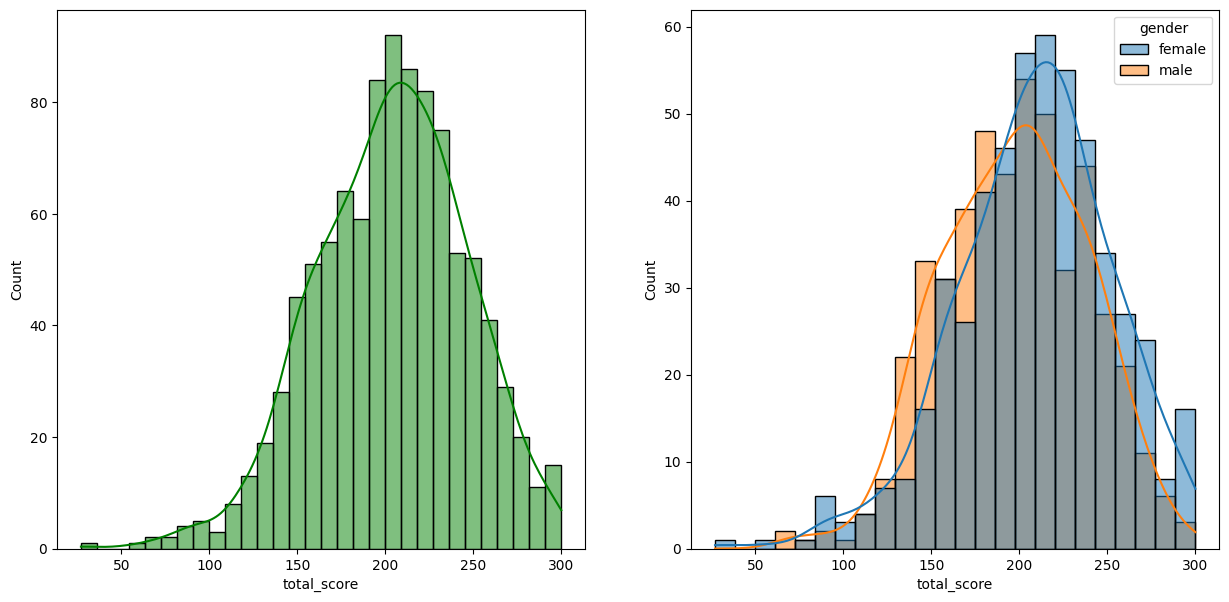

In [17]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

In [18]:
#from above 2 graphs for avg and total, it is found that in average graphs,
# female perform well as compared to male
# and total score for female is better tha male

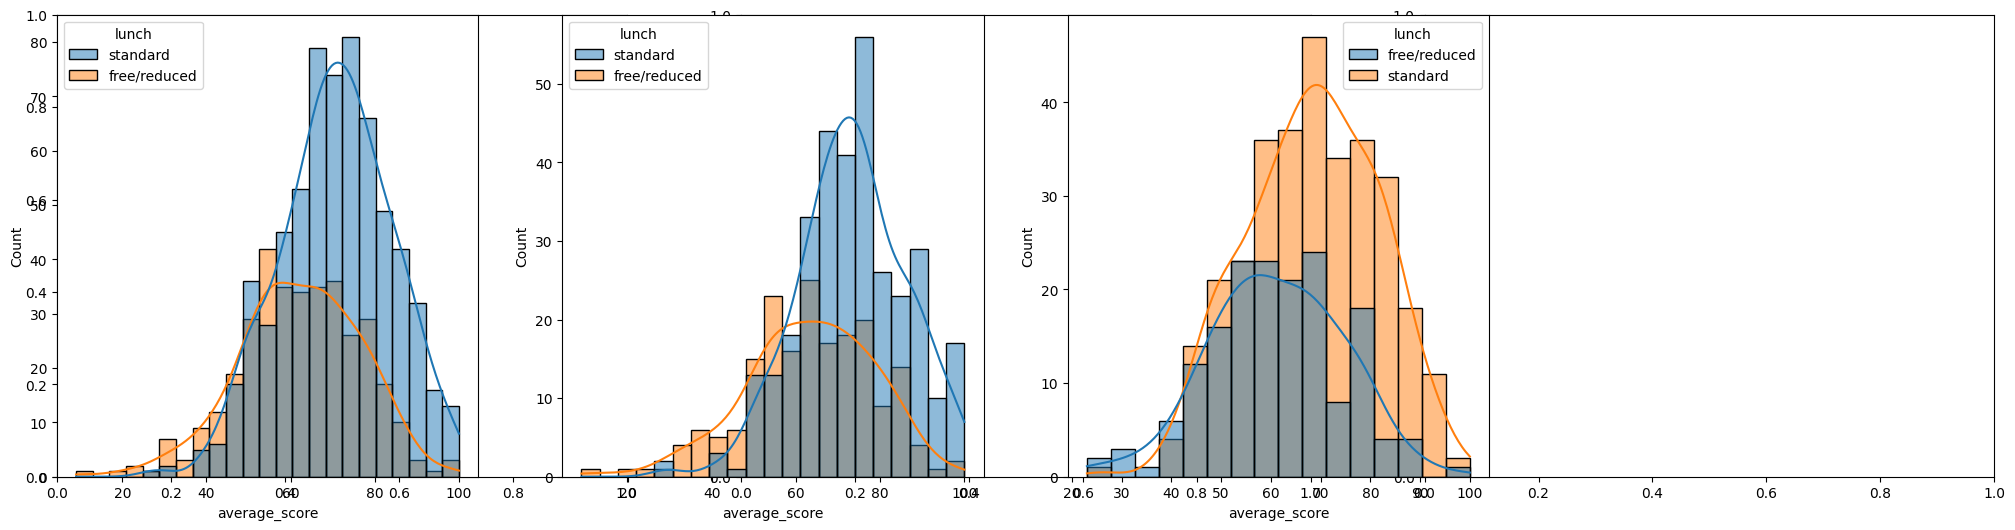

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sb.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sb.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sb.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insights from above graph:--

Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.


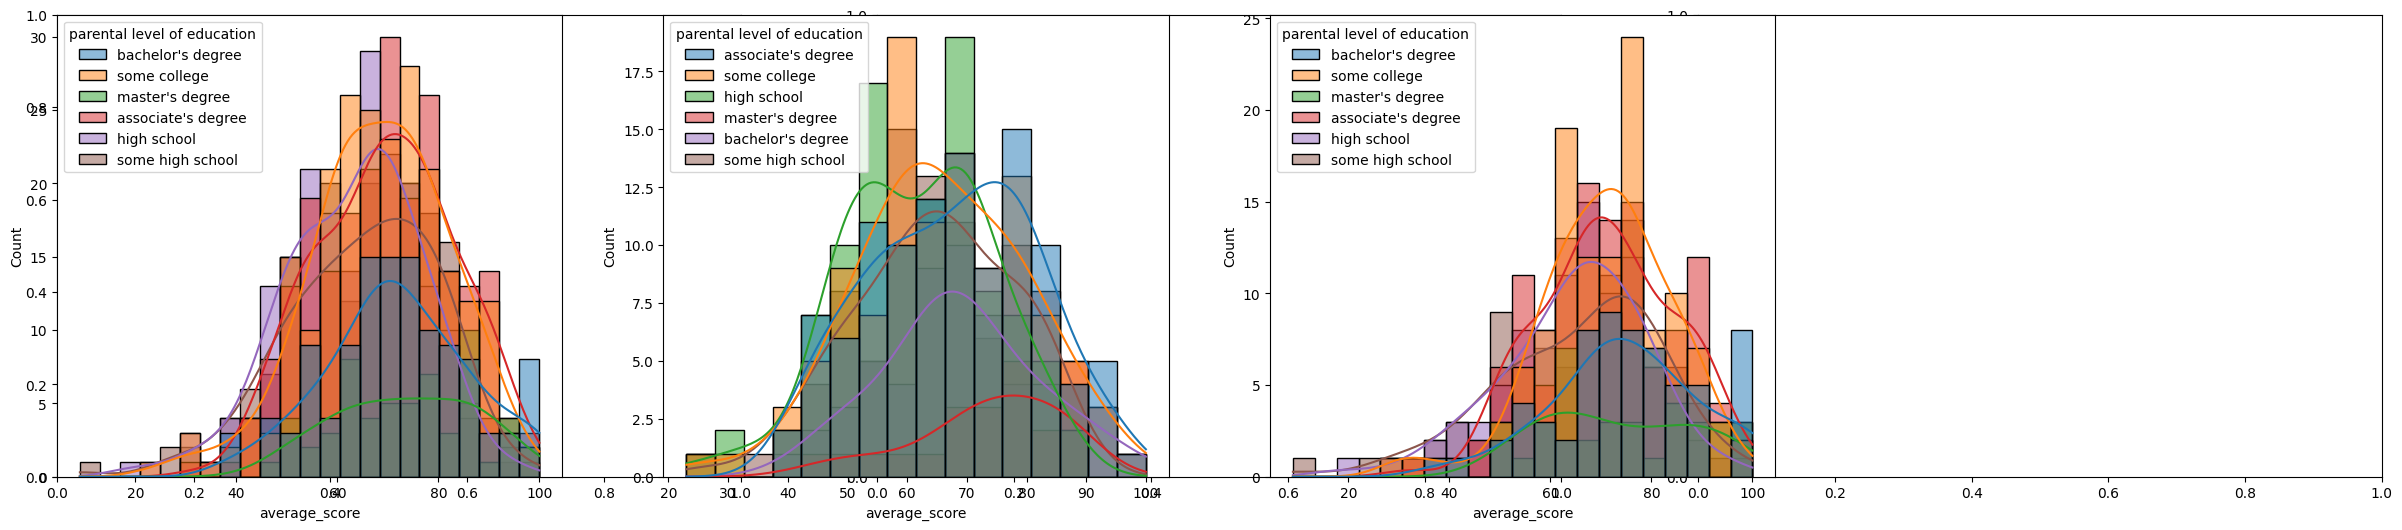

In [20]:

plt.subplots(1,3,figsize=(30,6))
plt.subplot(141)
ax =sb.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sb.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sb.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()


Insights:--

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

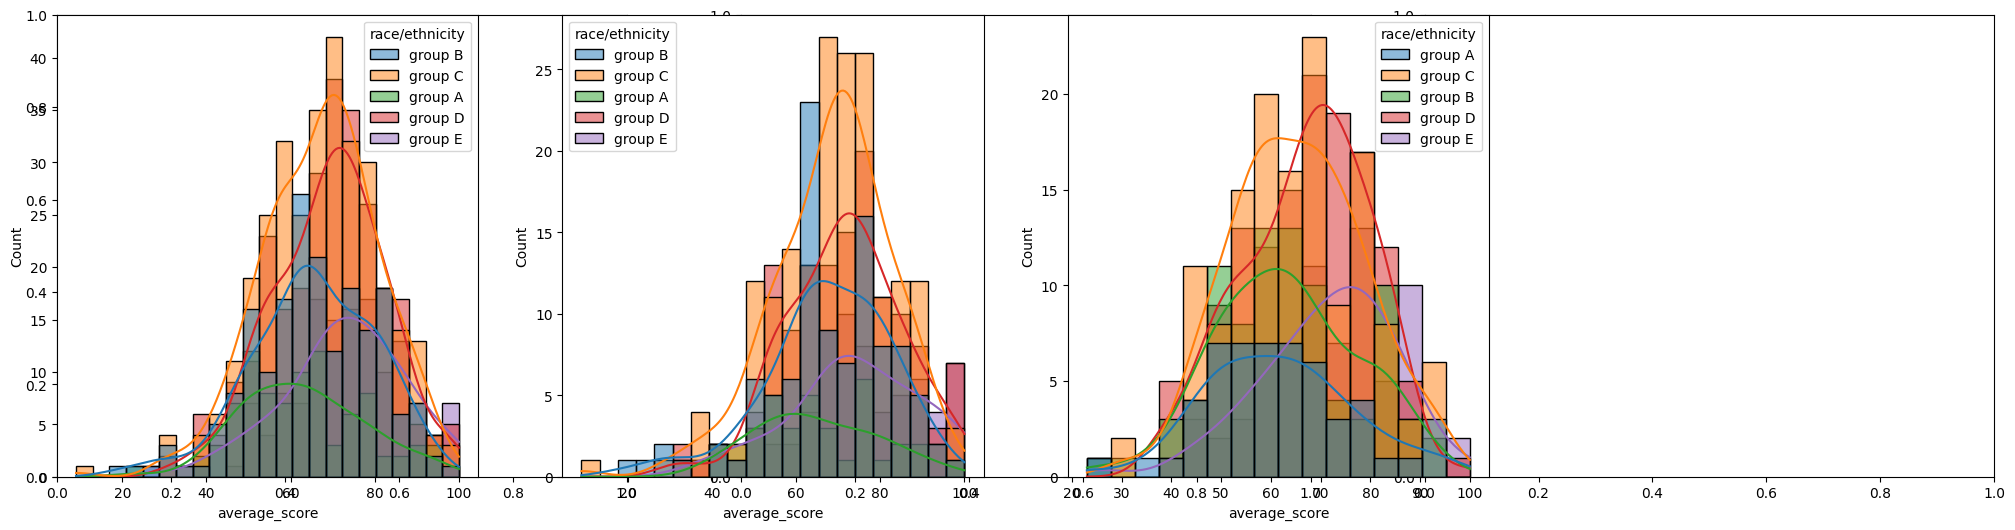

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sb.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
sb.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sb.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

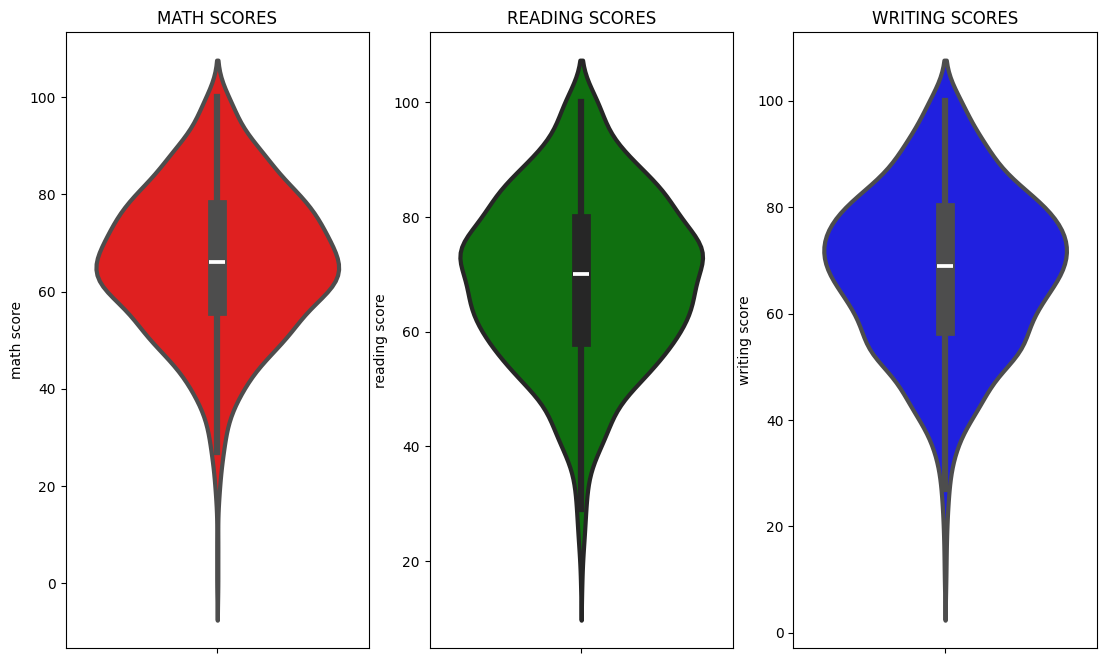

In [22]:
#4.2 Max score for student in all 3 subjects

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()


Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

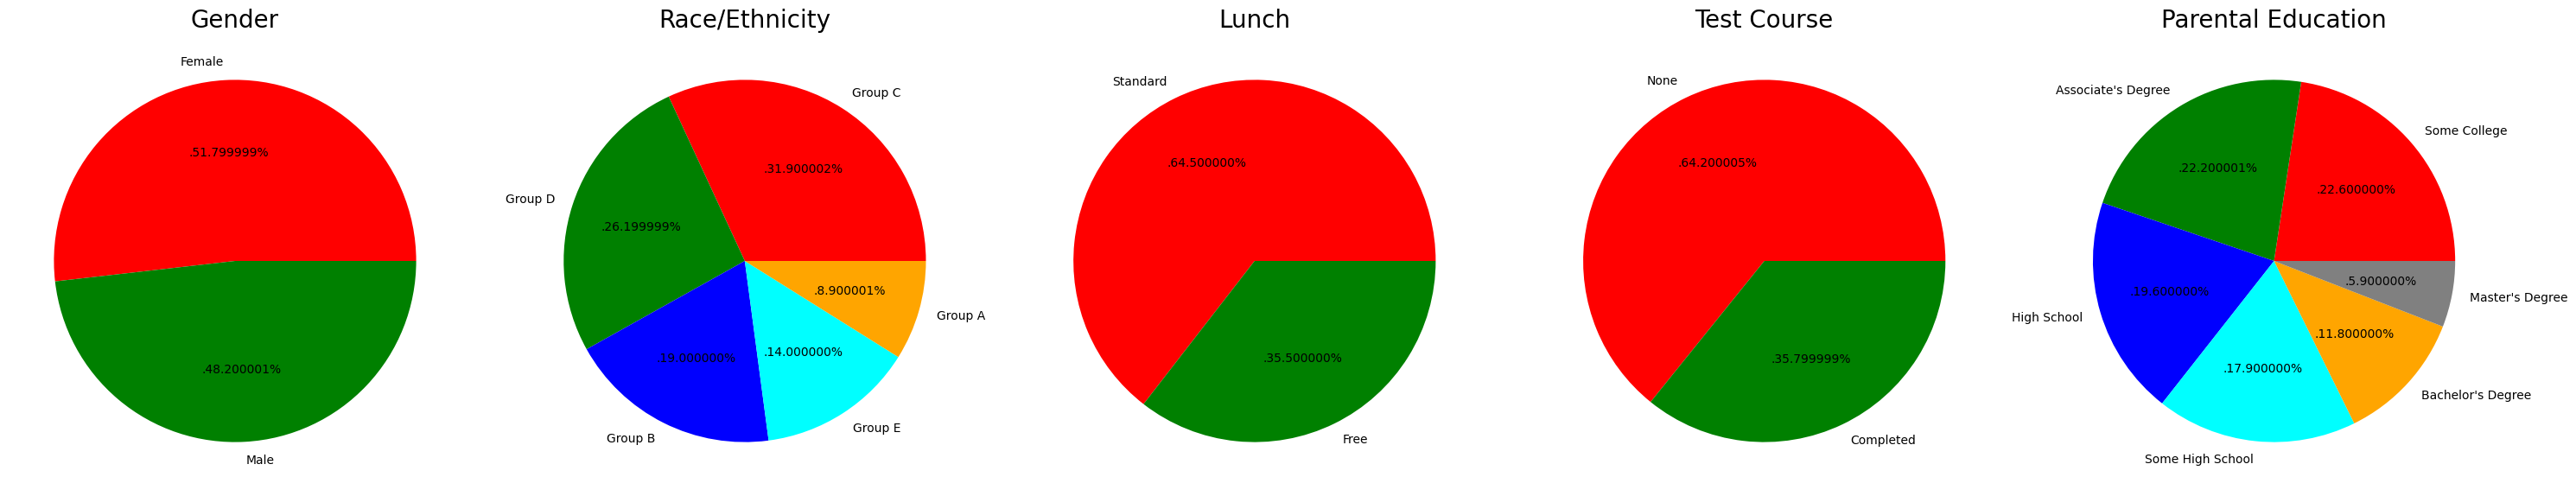

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

Number of Male and Female students is almost equal


Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# feature wise visualization


1. gender column

how is gender manipulation score or distrubution of gender

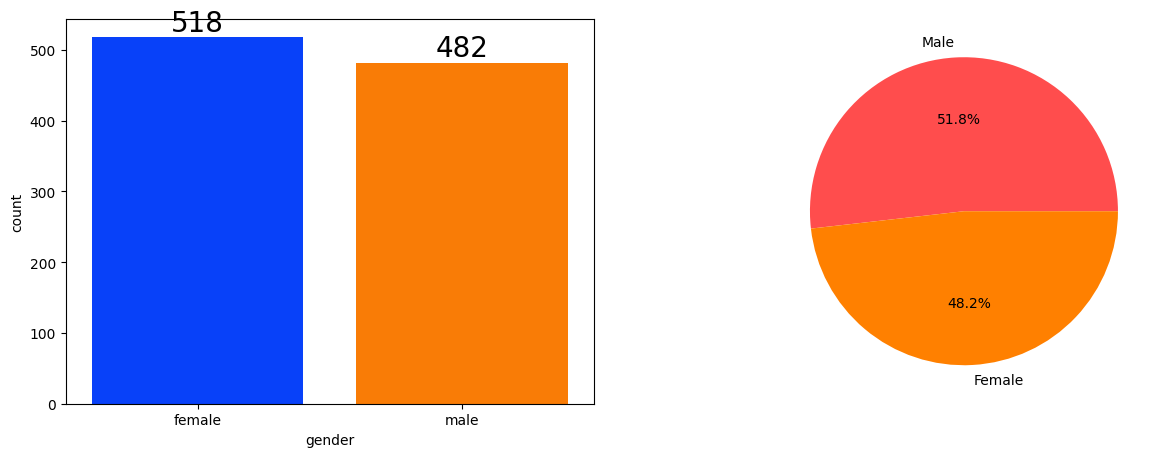

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sb.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',colors=['#ff4d4d','#ff8000'])
plt.show()


In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [39]:
# does gender have influence on scores
gender_group=df.groupby("gender").mean(numeric_only=True).reset_index()
gender_group

,gender,math score,reading score,writing score,total_score,average_score
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.819502


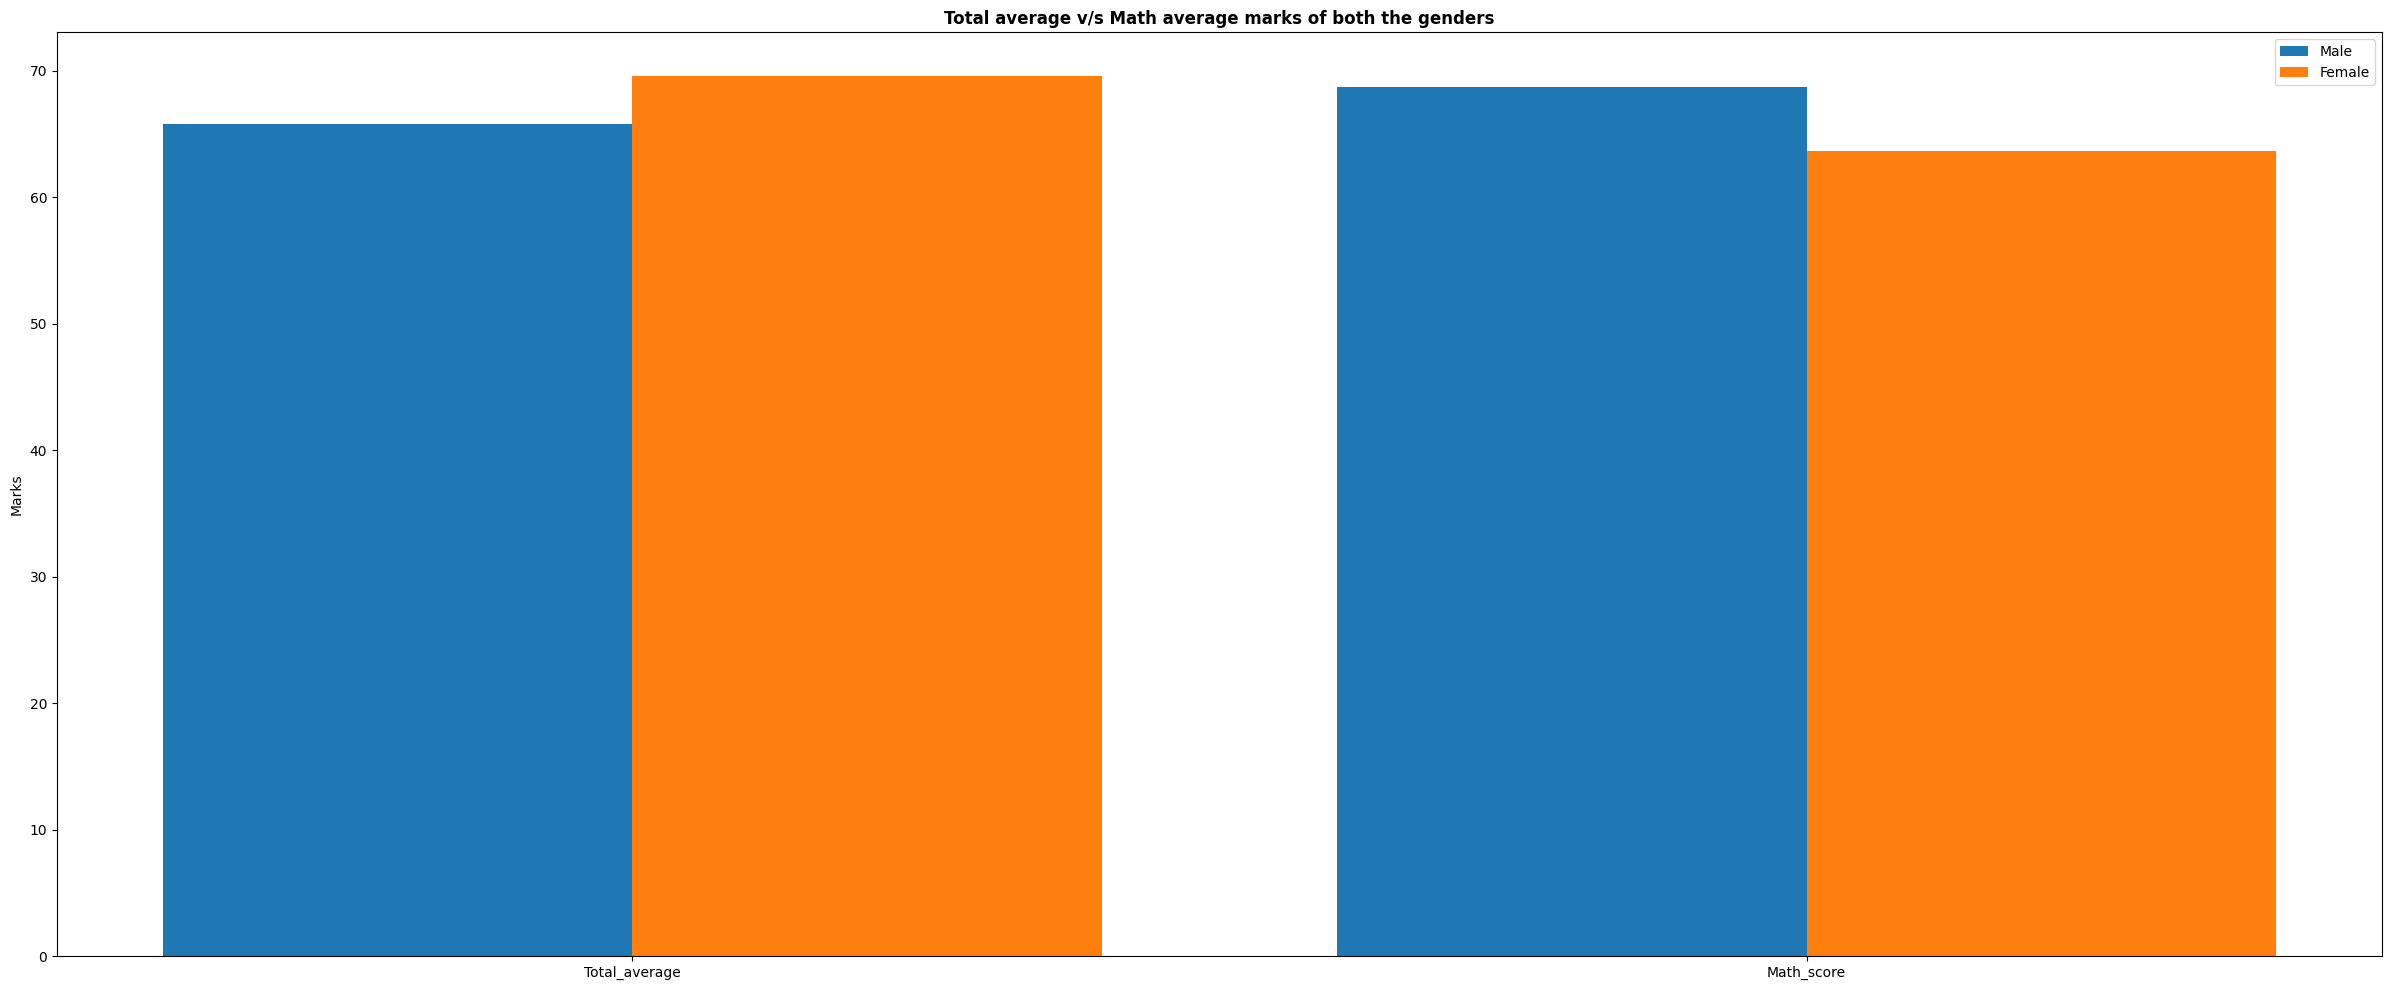

In [41]:
plt.Figure(figsize=(10,8))
X=["Total_average","Math_score"]
female_scores=[gender_group["average_score"][0],gender_group["math score"][0]]
male_scores=[gender_group["average_score"][1],gender_group["math score"][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
On an average females have a better overall score than men.
whereas males have scored higher in Maths.


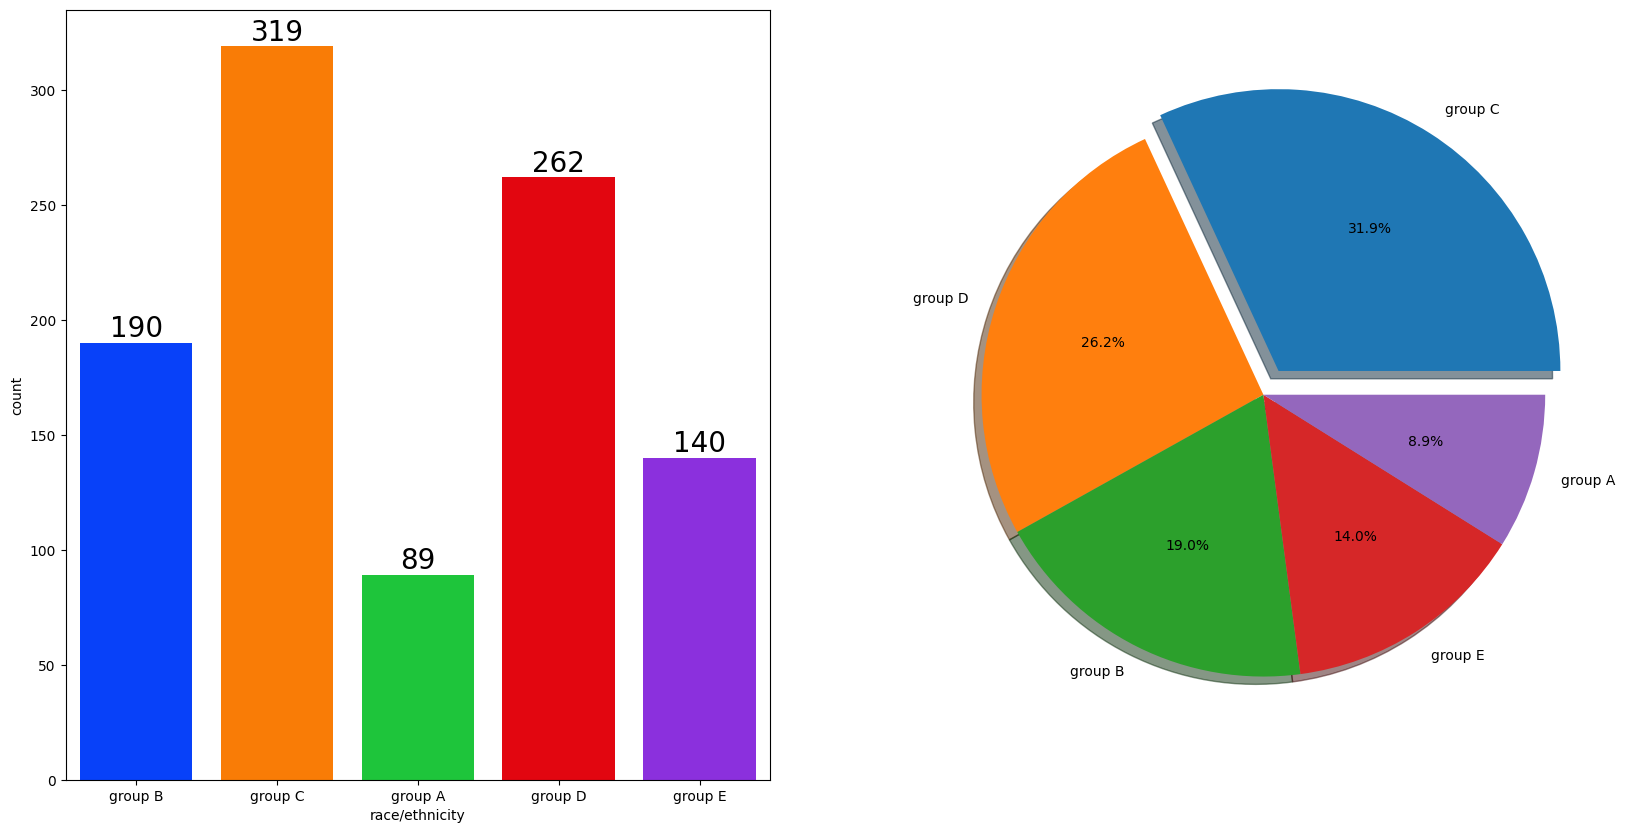

In [42]:
# how race and ethinicity impact performance
f,ax=plt.subplots(1,2,figsize=(20,10))
sb.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

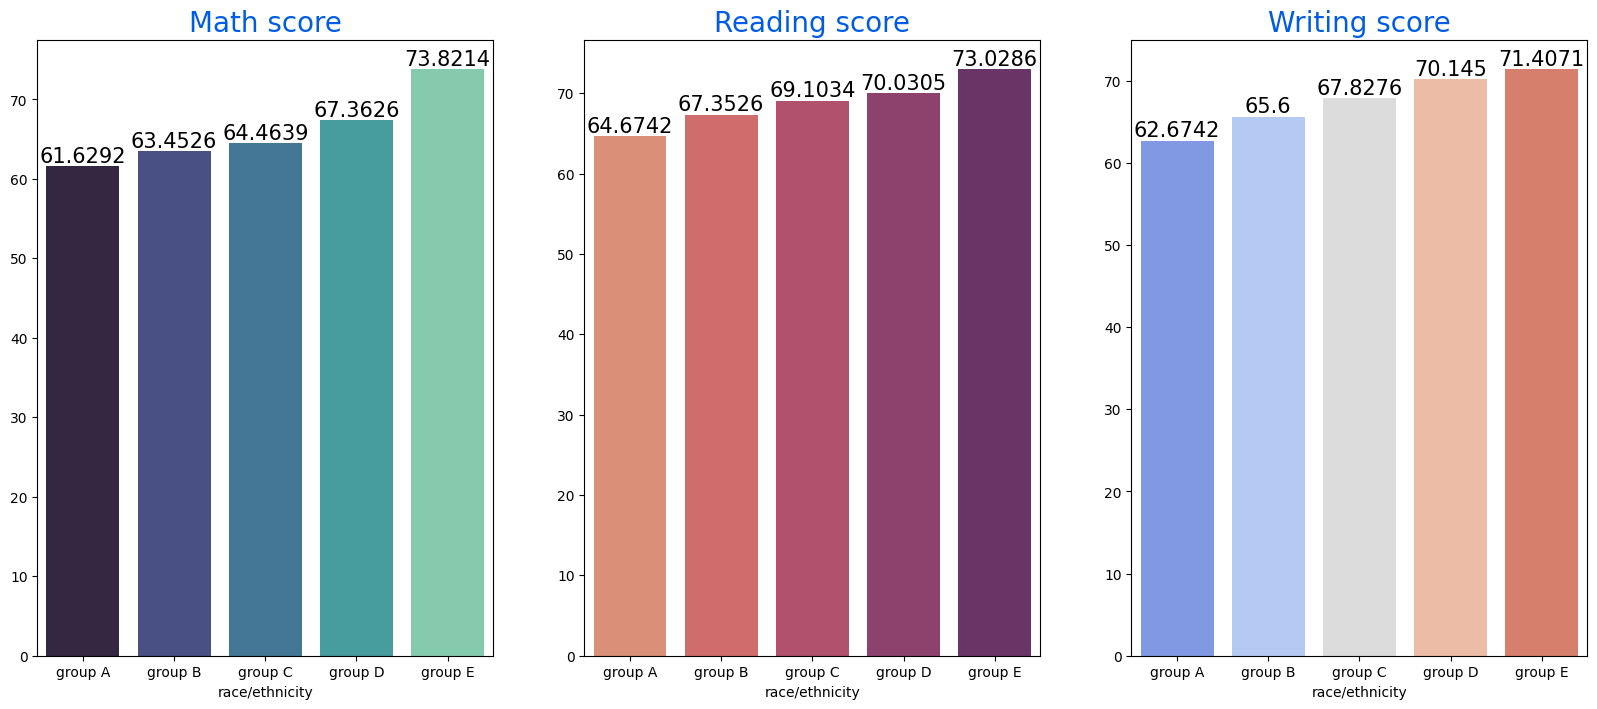

In [46]:
group_data_race=df.groupby("race/ethnicity")

f,ax=plt.subplots(1,3,figsize=(20,8))
sb.barplot(x=group_data_race['math score'].mean().index,y=group_data_race['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sb.barplot(x=group_data_race['reading score'].mean().index,y=group_data_race['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sb.barplot(x=group_data_race['writing score'].mean().index,y=group_data_race['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)



Insights
Group E students have scored the highest marks.


Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

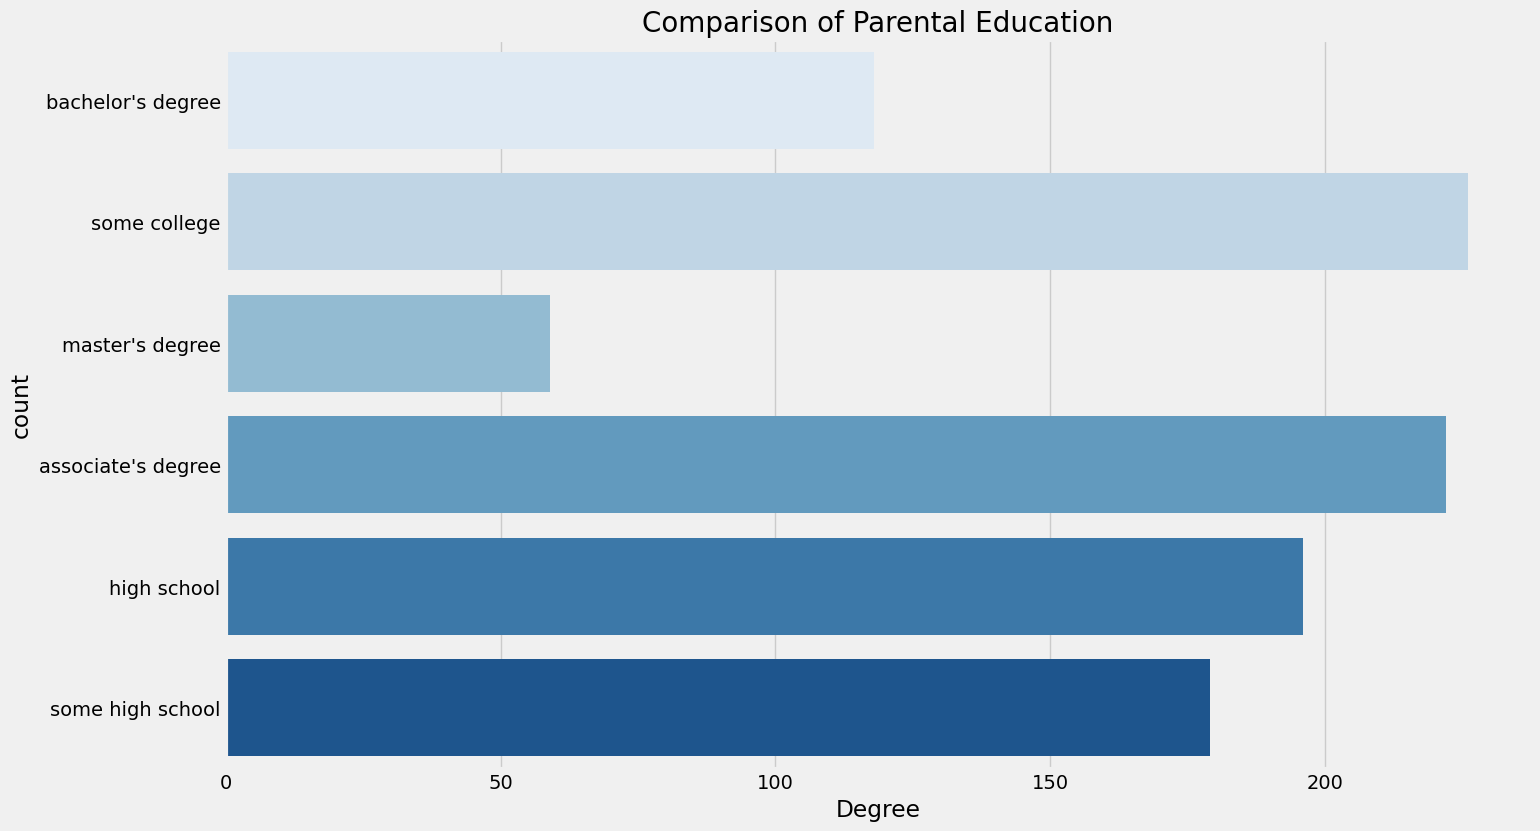

In [48]:
# parental education impact on score of students
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sb.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

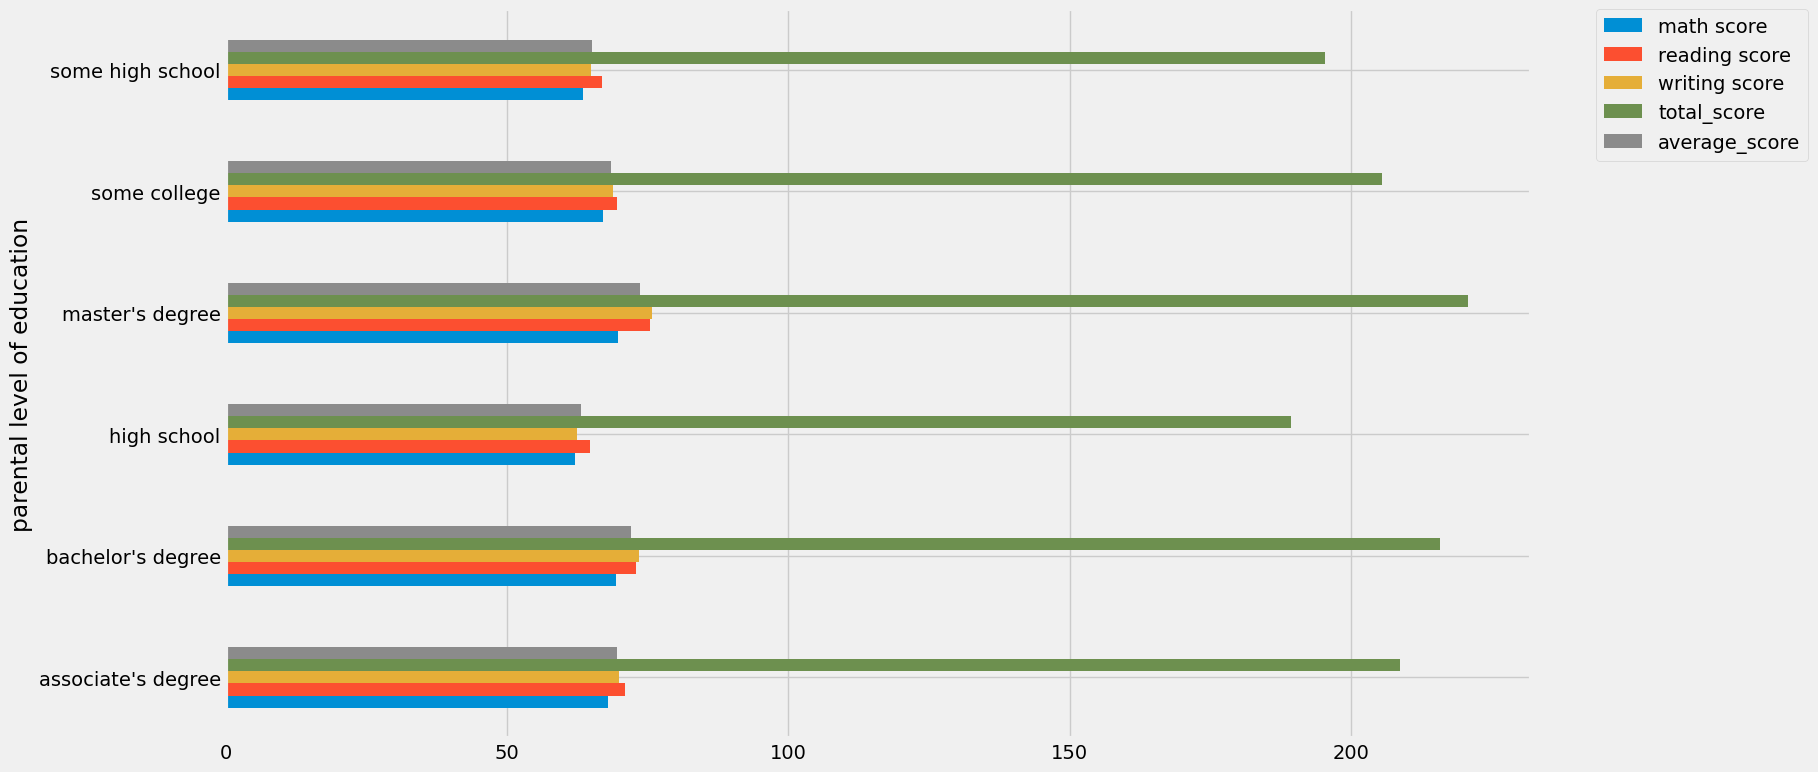

In [52]:
group_data_parents=df.groupby("parental level of education").mean(numeric_only=True)
group_data_parents.plot(kind='barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.


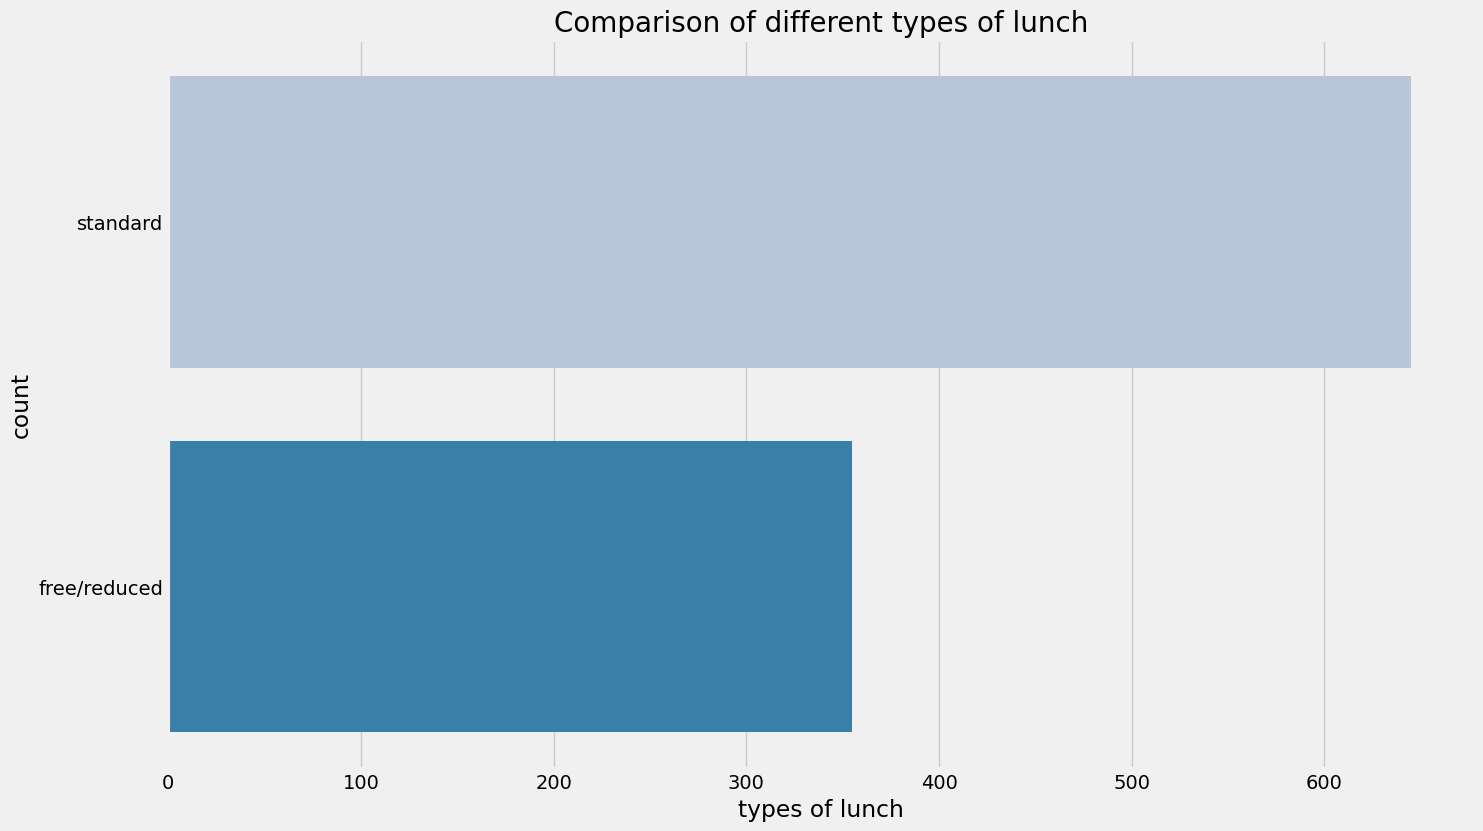

In [58]:
# Lunch affecting score
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sb.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

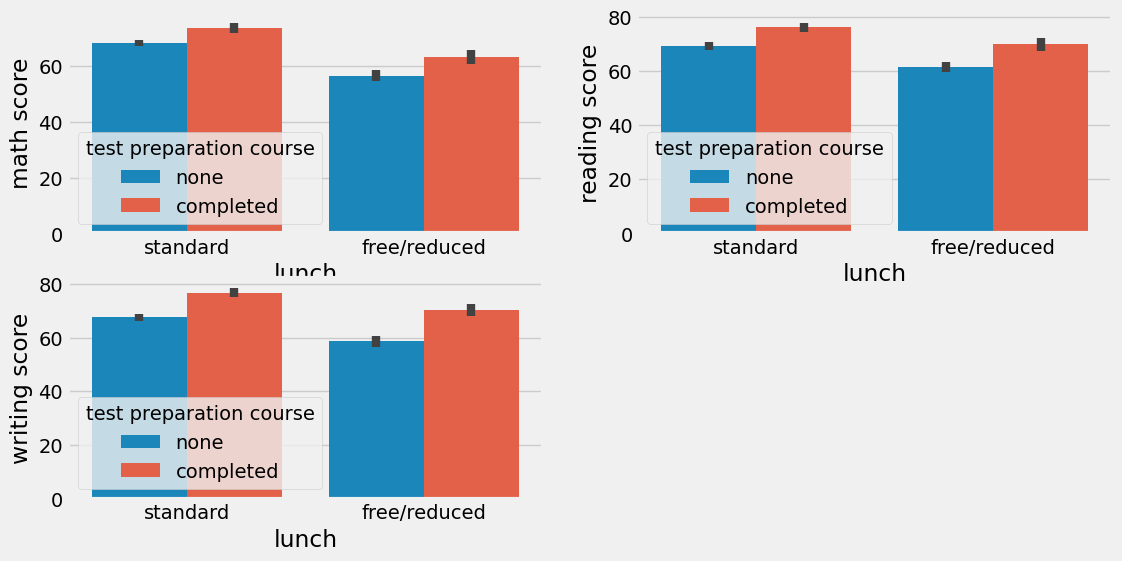

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sb.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sb.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sb.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

students who get standard lunch tend to perform well in each score

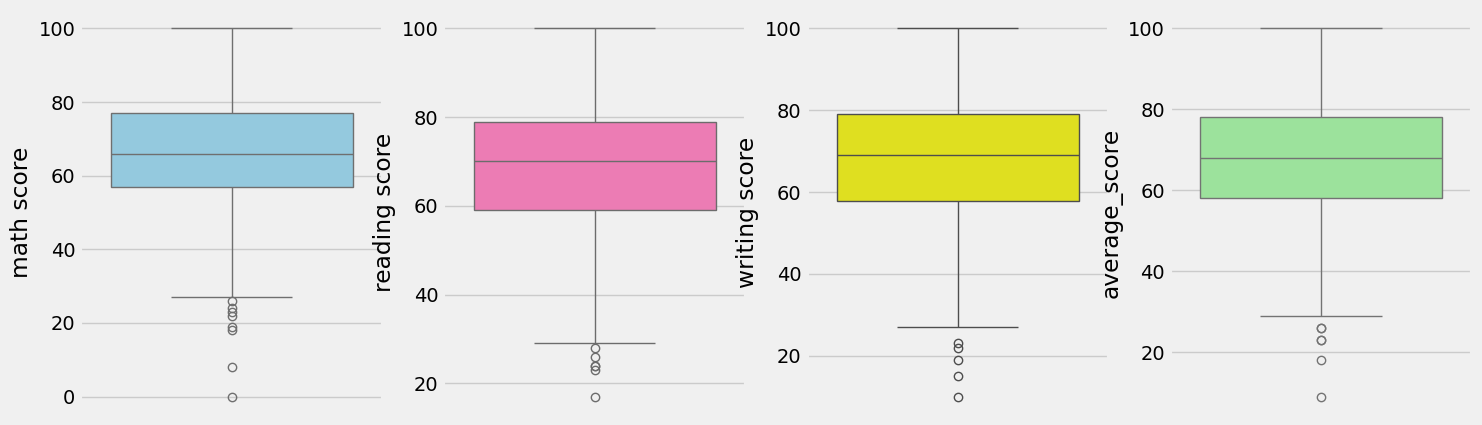

In [62]:
# check for outlier

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sb.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sb.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sb.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sb.boxplot(df['average_score'],color='lightgreen')
plt.show()

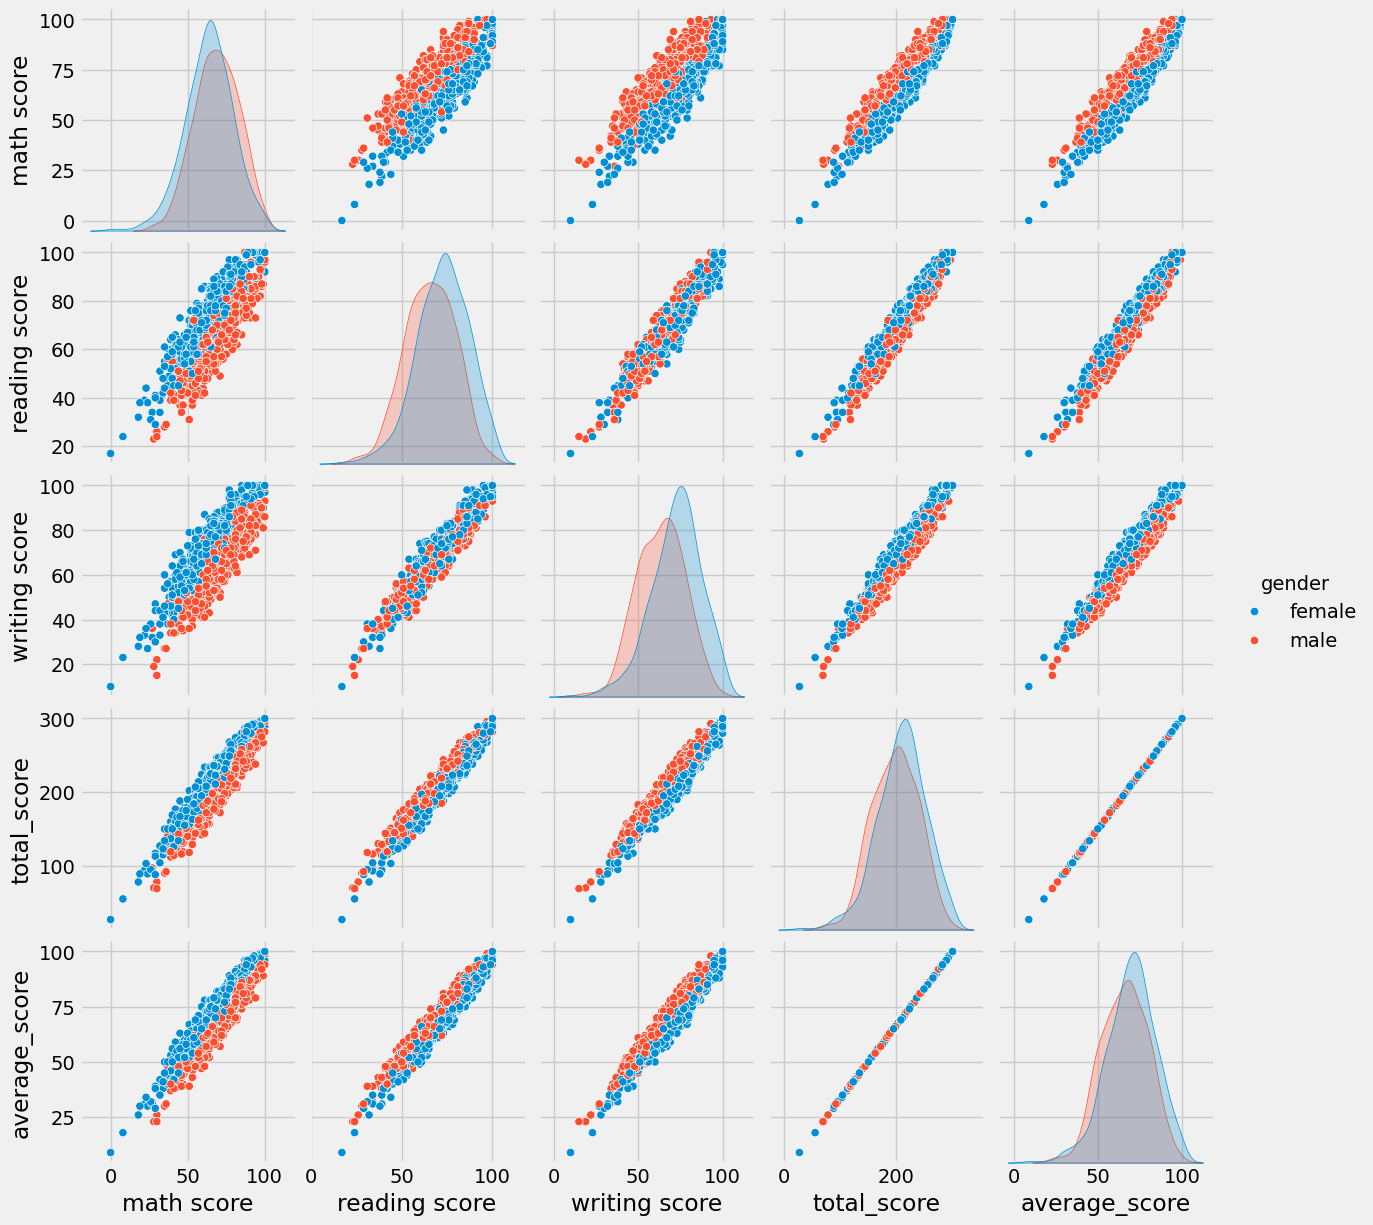

In [63]:
sb.pairplot(df,hue = 'gender')
plt.show()

# above graph shows that all scores are linear wrt to other features

5. Conclusions


Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.